In [ ]:
# Catalina Savage
# AST 5263 - Advanced Observational Astronomy
# Homework 3

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

# import astropy.units as u

# from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun #, FK5
# from astropy.time        import Time, TimeGPS

In [2]:
# # Point P
# P_lat = 45*u.degree + 00*u.arcminute + 00*u.arcsecond
# P_lon = 50*u.degree + 00*u.arcminute + 00*u.arcsecond

# # Point Q
# Q_lat = 45*u.degree + 00*u.arcminute + 30*u.arcsecond
# Q_lon = 50*u.degree + 00*u.arcminute + 30*u.arcsecond

# Point P, degrees
P_lat = 45
P_lon = 50

# del_theta = 0.00833333 # 30 arcseconds to degrees
del_theta = np.linspace( (1/3600), 10, 1000 )
# 1 arcsec = 1/3600 degrees
# del_theta is from 1/3600 deg to 10 deg
# print( del_theta )

# Point Q, in degrees
Q_lat = 45 + del_theta # 45 degrees and 30 arcsec
Q_lon = 50 + del_theta # 50 degrees and 30 arcsec

# print( Q_lat )

In [64]:
# del_Qlat = 45.00833333
# del_Qlon = 50.00833333

In [65]:
# del_diff_lat = del_Qlat - P_lat
# del_diff_lon = del_Qlon - P_lon

# del_rad_lat = np.radians( del_Qlat - P_lat )
# del_rad_lon = np.radians( del_Qlon - P_lon )

# print( del_rad_lat )

0.00014544404615520599


In [3]:
diff_lat = Q_lat - P_lat
diff_lon = Q_lon - P_lon

rad_lat = np.radians( Q_lat - P_lat )
rad_lon = np.radians( Q_lon - P_lon )

In [4]:
a_dist = np.sin( rad_lat/2 )**2 + np.cos( np.radians(P_lat) ) * np.cos( np.radians(Q_lat) ) * np.sin( rad_lon/2 )**2

# s_sph    = 2*np.arctan2( np.sqrt(a_dist), np.sqrt(1-a_dist) )
# ssph_deg = np.degrees( s_sph )

s_sph = np.degrees( 2*np.arctan2( np.sqrt(a_dist), np.sqrt(1-a_dist) ) )

# s_euc = np.sqrt( del_theta**2 + (del_theta*np.cos(phi))**2 )
# s_euc = np.sqrt( diff_lat**2 + diff_lon**2 )
s_euc = np.sqrt( diff_lat**2 + (diff_lon*np.cos(np.radians(P_lat)))**2 )

# print( ssph_deg )

In [5]:
del_s = s_euc - s_sph
# del_s = s_euc - ssph_deg
print( del_s )
# dels = np.abs( del_s )

[2.74895550e-10 3.77075230e-07 1.46796705e-06 3.27312187e-06
 5.79271124e-06 9.02690672e-06 1.29758799e-05 1.76398024e-05
 2.30188458e-05 2.91131818e-05 3.59229820e-05 4.34484182e-05
 5.16896620e-05 6.06468851e-05 7.03202593e-05 8.07099564e-05
 9.18161481e-05 1.03639006e-04 1.16178703e-04 1.29435409e-04
 1.43409298e-04 1.58100540e-04 1.73509308e-04 1.89635774e-04
 2.06480110e-04 2.24042487e-04 2.42323078e-04 2.61322054e-04
 2.81039588e-04 3.01475852e-04 3.22631017e-04 3.44505256e-04
 3.67098741e-04 3.90411644e-04 4.14444137e-04 4.39196393e-04
 4.64668583e-04 4.90860880e-04 5.17773456e-04 5.45406483e-04
 5.73760134e-04 6.02834580e-04 6.32629994e-04 6.63146549e-04
 6.94384417e-04 7.26343769e-04 7.59024780e-04 7.92427620e-04
 8.26552462e-04 8.61399479e-04 8.96968844e-04 9.33260728e-04
 9.70275304e-04 1.00801274e-03 1.04647322e-03 1.08565691e-03
 1.12556398e-03 1.16619461e-03 1.20754896e-03 1.24962722e-03
 1.29242954e-03 1.33595611e-03 1.38020710e-03 1.42518269e-03
 1.47088303e-03 1.517308

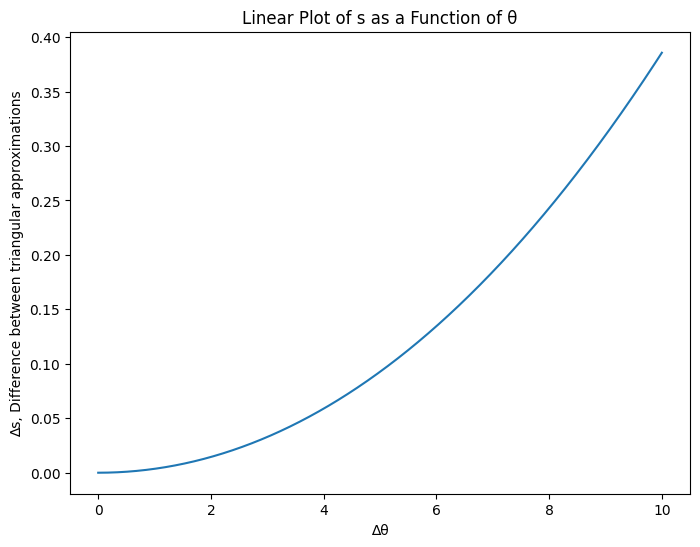

In [6]:
# linear**2 plot
plt.figure( figsize=(8,6) )
plt.plot( del_theta, del_s )
# plt.plot( del_theta, dels )

plt.title( 'Linear Plot of s as a Function of θ' )

plt.xlabel( '∆θ' )
plt.ylabel( '∆s, Difference between triangular approximations' )

plt.show()

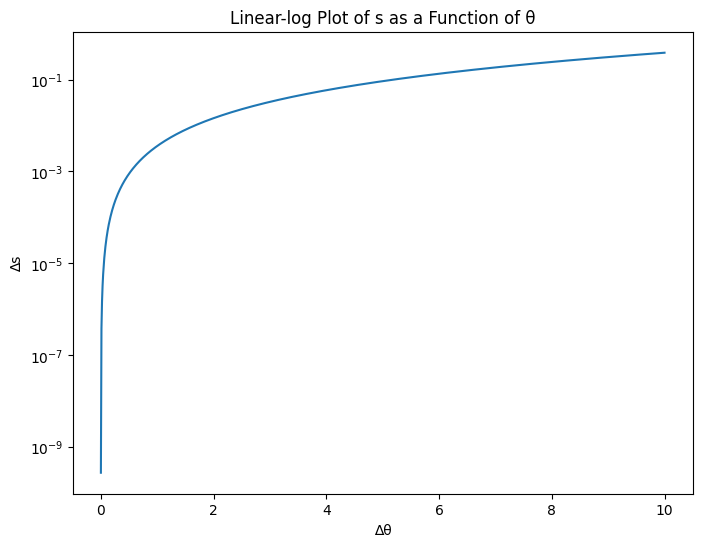

In [49]:
# linear*log plot
plt.figure( figsize=(8,6) )
plt.plot( del_theta, del_s )

plt.title( 'Linear-log Plot of s as a Function of θ' )

plt.xlabel( '∆θ' )
plt.ylabel( '∆s' )

# plt.xscale( 'log' )
plt.yscale( 'log' )

plt.show()

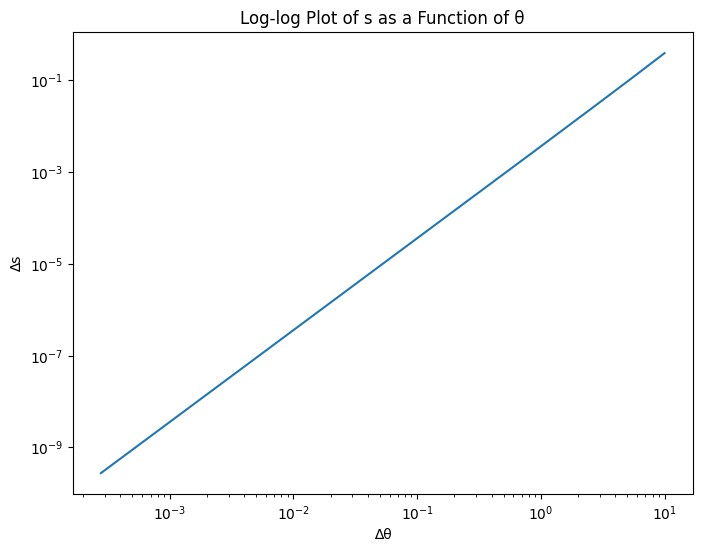

In [9]:
# log*log plot
plt.figure( figsize=(8,6) )
plt.plot( del_theta, del_s )

plt.title( 'Log-log Plot of s as a Function of θ' )

plt.xlabel( '∆θ' )
plt.ylabel( '∆s' )

plt.xscale( 'log' )
plt.yscale( 'log' )

plt.show()

In [35]:
cos_lat   = np.cos( ( P_lat + Q_lat ) / 2 )
s_euc_cos = np.sqrt( diff_lat**2 + (diff_lon*cos_lat)**2 )
# acc     = [ 0.1/3600, 1/3600, 0.1/60, 1/60 ]
# acc_arr = np.array( acc )
acc = np.array( [ 0.1/3600, 1/3600, 0.1/60, 1/60 ] )
# this is in degrees
del_arcsec = s_euc_cos*3600 - 1
acc_idx = np.argmax( del_arcsec > 0, axis=0 )
del_max = del_theta[ acc_idx ]
print( del_max )

0.0002777777777777778


In [37]:
cos_lat   = np.cos( ( np.radians(P_lat) + np.radians(Q_lat) ) / 2 )
s_euc_cos = np.sqrt( rad_lat**2 + (rad_lon*cos_lat)**2 )

acc = np.array( [ 0.1/3600, 1/3600, 0.1/60, 1/60 ] )

del_arcsec = s_euc_cos*3600 - 1

acc_idx = np.argmax( del_arcsec > 0, axis=0 )
del_max = del_theta[ acc_idx ]

print( del_max )

0.020297241686130577


In [8]:
# acc_s  = del_s.reshape( 4, -1 )
acc_s = del_s[ :,np.newaxis ]
# acc_na = acc_arr[ :, np.newaxis ]

# acc_idx = np.argmax( del_s.reshape( -1,100 ) > acc[ :,np.newaxis ], axis=1 )
# acc_idx = np.argmax( acc_s > acc_na, axis=1 )
# acc_idx = np.argmax( del_s[ :,np.newaxis ] > acc, axis=0 )
acc_idx = np.argmax( acc_s > acc, axis=0 )

del_max = del_theta[ acc_idx ]

In [ ]:
d_max1 = del_max[ 0 ]
d_max2 = del_max[ 1 ]
d_max3 = del_max[ 2 ]
d_max4 = del_max[ 3 ]

In [38]:
acc = np.array( [ 0.1/3600, 1/3600, 0.1/60, 1/60 ] )

acc_s = del_s[ :, np.newaxis ]
acc_idx = np.argmax( acc_s > acc, axis=0 )
del_max = del_theta[ acc_idx ]

In [40]:
print( f'Maximum ∆θ for 0.1": {del_max[0]} degrees' )
print( f'Maximum ∆θ for   1": {del_max[1]} degrees' )
print( f"Maximum ∆θ for 0.1': {del_max[2]} degrees" )
print( f"Maximum ∆θ for   1': {del_max[3]} degrees" )

Maximum ∆θ for 0.1": 0.09036536536536538 degrees
Maximum ∆θ for   1": 0.280550272494717 degrees
Maximum ∆θ for 0.1': 0.6909492826159495 degrees
Maximum ∆θ for   1': 2.152370147925704 degrees


In [26]:
del_theta = np.linspace( (1/3600), 10, 1000 )
acc = np.array( [ 0.1/3600, 1/3600, 0.1/60, 1/60 ] )
# print( acc )

In [25]:
# lat_avg = ( P_lat + Q_lat ) / 2
lat_avg = P_lat + ( del_theta / 2 )
# print( lat_avg )

In [24]:
acc1 = del_s * np.cos( lat_avg ) <= acc[ 0 ]
acc2 = del_s * np.cos( lat_avg ) <= acc[ 1 ]
acc3 = del_s * np.cos( lat_avg ) <= acc[ 2 ]
acc4 = del_s * np.cos( lat_avg ) <= acc[ 3 ]

# acc1 = del_s * np.cos( P_lat+(del_theta/2) ) <= acc[ 0 ]
# acc2 = del_s * np.cos( P_lat+(del_theta/2) ) <= acc[ 1 ]
# acc3 = del_s * np.cos( P_lat+(del_theta/2) ) <= acc[ 2 ]
# acc4 = del_s * np.cos( P_lat+(del_theta/2) ) <= acc[ 3 ]

In [22]:
print( acc3[5] )

True


In [ ]:
import numpy as np

# Constants
Plat = np.radians(45.0)  # Latitude of point P in radians
Plon = np.radians(50.0)  # Longitude of point P in radians

# Function to calculate cosine-latitude factor
def cosine_latitude_factor(Plat, Qlat):
    return np.cos((Plat + Qlat) / 2)

# Function to calculate angular distance using small-spherical-triangle approximation with cosine-latitude factor
def s_euc_with_cosine_factor(Plat, Plon, Qlat, Qlon):
    return np.sqrt((Qlat - Plat)**2 + ((Qlon - Plon) * cosine_latitude_factor(Plat, Qlat))**2)

# Desired accuracies in arcseconds
accuracies = np.array([0.1 / 3600, 1 / 3600, 0.1 / 60, 1 / 60])

# Function to find the maximum acceptable ∆θ for a given accuracy
def find_max_delta_theta_with_accuracy(accuracy):
    delta_theta = 1 / 3600  # Initial delta_theta value
    while True:
        Qlat = Plat + delta_theta
        Qlon = Plon + delta_theta
        seuc = s_euc_with_cosine_factor(Plat, Plon, Qlat, Qlon)
        delta_s = seuc * 3600 - 1  # Convert seuc to arcseconds and subtract the desired accuracy
        if delta_s > 0:
            return delta_theta
        delta_theta += 1 / 3600  # Increase delta_theta by 1 arcsecond

# Iterate over each desired accuracy and find the maximum acceptable ∆θ
for i, accuracy in enumerate(accuracies):
    max_delta_theta = find_max_delta_theta_with_accuracy(accuracy)
    print(f"(i) Maximum ∆θ for {accuracy * 3600:.1f}'' accuracy: {max_delta_theta:.6f} degrees")
